In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


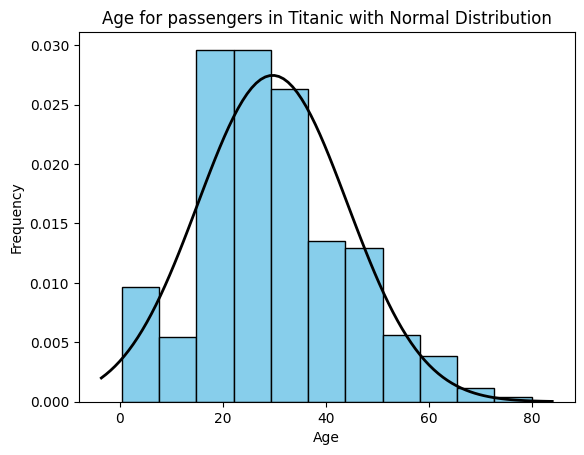

In [6]:
import scipy.stats as stats

mean_age = df["Age"].mean()
std_age = df["Age"].std()

plt.hist(df["Age"], bins=11, color='skyblue', edgecolor='black', density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_age, std_age)

plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age for passengers in Titanic with Normal Distribution")

plt.show()

In [7]:
from scipy.stats import kstest, norm

# ทดสอบการแจกแจงปกติของ Age
stat, p_value = kstest(df['Age'].dropna(), 'norm', args=(df['Age'].mean(), df['Age'].std()))

print(f"K-S Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("The data of Age might come from a normal distribution")
else:
    print("The data of Age does not come from a normal distribution")


K-S Test Statistic: 0.06456656793494475, p-value: 0.004958146899084225
The data of Age does not come from a normal distribution


In [8]:
df_selected = df[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [9]:
df_selected

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df_selected.loc[:, "Age"] = df_selected["Age"].fillna(df_selected["Age"].median()) # use median due to It's come from normal distribution.

In [11]:
df_selected.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [12]:
df_selected.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
df_selected['Embarked'].fillna(df_selected['Embarked'].mode()[0], inplace=True)


<ipython-input-13-6a52ac0274b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['Embarked'].fillna(df_selected['Embarked'].mode()[0], inplace=True)
<ipython-input-13-6a52ac0274b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Embarked'].fillna(df_selected['Embarked'].mode()[0], inplace=True)


In [14]:
df_selected.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [15]:
df_selected.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
df_selected.tail(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
871,1,1,female,47.0,1,1,52.5542,S
872,0,1,male,33.0,0,0,5.0000,S
873,0,3,male,47.0,0,0,9.0000,S
874,1,2,female,28.0,1,0,24.0000,C
875,1,3,female,15.0,0,0,7.2250,C
876,0,3,male,20.0,0,0,9.8458,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,28.0,0,0,7.8958,S
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S


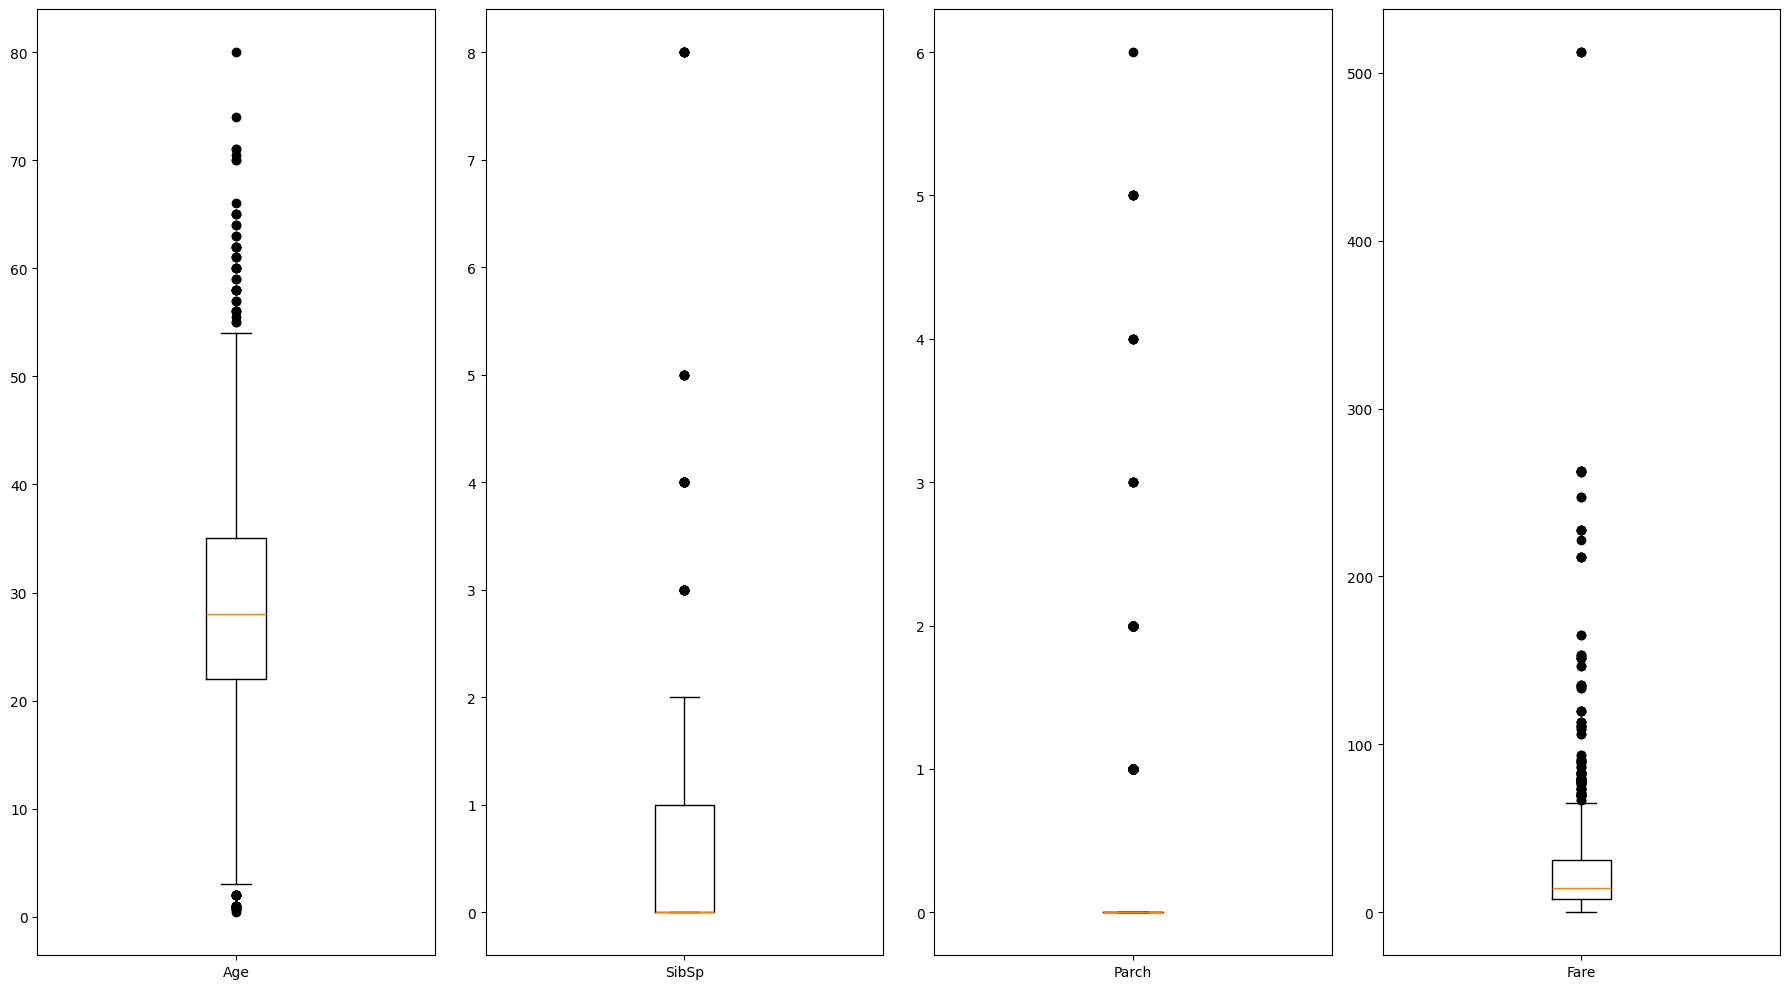

In [17]:
numeric_cols = ["Age", "SibSp", "Parch", "Fare"]
fig, axes = plt.subplots(figsize=(18, 10), nrows=1, ncols=4, squeeze=0)
i = 0
for ax, col in zip(axes.reshape(-1), numeric_cols):
 ax.boxplot(df_selected[col], tick_labels=[col], sym='k')
plt.tight_layout()

In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) of Age
Q1_Age = df_selected["Age"].quantile(0.25)
Q3_Age = df_selected["Age"].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
print(f"IQR for Age is: {IQR_Age}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of SibSp
Q1_SibSp = df_selected["SibSp"].quantile(0.25)
Q3_SibSp = df_selected["SibSp"].quantile(0.75)
IQR_SibSp = Q3_SibSp - Q1_SibSp
print(f"IQR for SibSp is: {IQR_SibSp}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of Parch
Q1_Parch = df_selected["Parch"].quantile(0.25)
Q3_Parch = df_selected["Parch"].quantile(0.75)
IQR_Parch = Q3_Parch - Q1_Parch
print(f"IQR for Parch is: {IQR_Parch}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of Fare
Q1_Fare = df_selected["Fare"].quantile(0.25)
Q3_Fare = df_selected["Fare"].quantile(0.75)
IQR_Fare = Q3_Fare - Q1_Fare
print(f"IQR for Fare is: {IQR_Fare :.2f}")



IQR for Age is: 13.0
IQR for SibSp is: 1.0
IQR for Parch is: 0.0
IQR for Fare is: 23.09


In [19]:
lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age
print(f"lower_bound_Age: {lower_bound_Age}")
print(f"upper_bound_Age: {upper_bound_Age}")
print("-----------------------------------")
lower_bound_SibSp = Q1_SibSp - 1.5 * IQR_SibSp
upper_bound_SibSp = Q3_SibSp + 1.5 * IQR_SibSp
print(f"lower_bound_SibSp: {lower_bound_SibSp}")
print(f"upper_bound_SibSp: {upper_bound_SibSp}")
print("-----------------------------------")
lower_bound_Parch = Q1_Parch - 1.5 * IQR_Parch
upper_bound_Parch = Q3_Parch + 1.5 * IQR_Parch
print(f"lower_bound_Parch: {lower_bound_Parch}")
print(f"upper_bound_Parch: {upper_bound_Parch}")
print("-----------------------------------")
lower_bound_Fare = Q1_Fare - 1.5 * IQR_Fare
upper_bound_Fare = Q3_Fare + 1.5 * IQR_Fare
print(f"lower_bound_Fare: {lower_bound_Fare}")
print(f"upper_bound_Fare: {upper_bound_Fare}")
print("-----------------------------------")


lower_bound_Age: 2.5
upper_bound_Age: 54.5
-----------------------------------
lower_bound_SibSp: -1.5
upper_bound_SibSp: 2.5
-----------------------------------
lower_bound_Parch: 0.0
upper_bound_Parch: 0.0
-----------------------------------
lower_bound_Fare: -26.724
upper_bound_Fare: 65.6344
-----------------------------------


In [20]:
df_filtered = df_selected[
    ((df_selected['Age'] >= lower_bound_Age) & (df_selected['Age'] <= upper_bound_Age)) &
    ((df_selected['SibSp'] >= lower_bound_SibSp) & (df_selected['SibSp'] <= upper_bound_SibSp)) &
    ((df_selected['Parch'] >= lower_bound_Parch) & (df_selected['Parch'] <= upper_bound_Parch)) &
    ((df_selected['Fare'] >= lower_bound_Fare) & (df_selected['Fare'] <= upper_bound_Fare))
    ]


In [21]:
df_filtered

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [22]:
df_filtered.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q


In [23]:
df_filtered.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
884,0,3,male,25.0,0,0,7.05,S
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [24]:
df_filtered['Sex'].value_counts()

,count
Sex,
male,434
female,143


In [25]:
df_filtered.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [26]:
df_filtered = pd.get_dummies(df_filtered, columns=["Sex"],drop_first=True)


In [27]:
df_filtered.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,S,True
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True
5,0,3,28.0,0,0,8.4583,Q,True


In [28]:
df_filtered["Sex_male"] = df_filtered["Sex_male"].astype(int)

In [29]:
df_filtered.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,S,1
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
5,0,3,28.0,0,0,8.4583,Q,1


In [30]:
df_filtered['Embarked'].value_counts()

,count
Embarked,
S,433
C,80
Q,64


In [31]:
df_filtered = pd.get_dummies(df_filtered, columns=['Embarked'], drop_first=True)
df_filtered['Embarked_Q'] = df_filtered['Embarked_Q'].astype(int)
df_filtered['Embarked_S'] = df_filtered['Embarked_S'].astype(int)

In [32]:
df_filtered.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,28.0,0,0,8.4583,1,1,0


In [33]:
df_filtered = df_filtered.reset_index(drop=True)

In [34]:
df_filtered.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,3,26.0,0,0,7.9250,0,0,1
2,1,1,35.0,1,0,53.1000,0,0,1
3,0,3,35.0,0,0,8.0500,1,0,1
4,0,3,28.0,0,0,8.4583,1,1,0


In [35]:
df_filtered.shape

(577, 9)

In [36]:
X = df_filtered.drop('Survived', axis=1) # features
y = df_filtered['Survived']  # target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17) # 70/30

In [37]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,3,26.0,0,0,7.9250,0,0,1
2,1,35.0,1,0,53.1000,0,0,1
3,3,35.0,0,0,8.0500,1,0,1
4,3,28.0,0,0,8.4583,1,1,0


In [38]:
y.head()

,Survived
0,0
1,1
2,1
3,0
4,0


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [53]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")

Decision Tree Accuracy: 0.7529


In [54]:
# LogisticRegression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test,y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

Logistic Regression Accuracy: 0.8161


In [60]:
# RandomForest
"""
We should determine random_state for RandomForest to ensure reproducibility,
as RandomForest involves internal randomness in feature selection and data sampling.
"""
rand_forest = RandomForestClassifier(random_state=17)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
accuracy_rand_forest = accuracy_score(y_test,y_pred_rand_forest)
print(f"RandomForestClassifier Accuracy: {accuracy_rand_forest:.4f} ")

RandomForestClassifier Accuracy: 0.8103 


In [61]:
# XGBoost
xgBoost = XGBClassifier()
xgBoost.fit(X_train,y_train)
y_pred_xgBoost = xgBoost.predict(X_test)
accuracy_xgBoost = accuracy_score(y_test,y_pred_xgBoost)
print(f"XGBoost Accuracy: {accuracy_xgBoost:.4f}")

XGBoost Accuracy: 0.8218


<h1>The Model We Chose:</h1> <br>
<h5>At this time, we have chosen XGBoost because it has the highest accuracy of 0.8218.</h5>
